# Project in Applied Statistics Module

### Edward Cronin ATU Student G00425645

# PlantGrowth Analysis

### Steps to complete this project

Step 1: Download and Save the Dataset:
- The dataset is downloaded from [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/datasets.html).
- The dataset is saved to Applied_Statistics_MyWork repository.

Step 2: Describe the Dataset:
- Load the dataset into a pandas DataFrame.
- Provide a summary of the dataset, including the number of observations, the variables, and their types.

Step 3: Perform t-tests and ANOVA:
- Perform a t-test to determine if there is a significant difference between the two treatment groups (trt1 and trt2).
- Perform ANOVA to determine if there is a significant difference between the three treatment groups (ctrl, trt1, and trt2).

Step 4: Explain my Work:
- Describe what a t-test is, how it works, and its assumptions.
- Explain why ANOVA is more appropriate than multiple t-tests when analyzing more than two groups.

# Step 1: Download Dataset

In [8]:
# Import libraries to complete this project
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv(url)

# Save the dataset to the repository 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
df.to_csv('PlantGrowth.csv', index=False)

# Step 2: Generate Information on the dataset

In [2]:
# Describe the dataset
# # To get an initial look at the dataset, we can display the first few rows using the head() method. This gives us a quick overview of the data.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
print(df.head())

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl


In [3]:
# Print the summary statistics of the dataset
# We provide a summary of the dataset using the describe() method. 
# This method gives us important statistical information about the numerical columns 
# in the dataset, such as the count, mean, standard deviation, minimum, and maximum values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
print(df.describe())

        rownames     weight
count  30.000000  30.000000
mean   15.500000   5.073000
std     8.803408   0.701192
min     1.000000   3.590000
25%     8.250000   4.550000
50%    15.500000   5.155000
75%    22.750000   5.530000
max    30.000000   6.310000


In [4]:
# Information about the dataset 
# The info() method provides a concise summary of the dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes
None


# Step 3: Perform T-Test

## Load the Data and Seperate the Groups

In [5]:
# Data was loaded successully in Step 1

# Separate the data into the treatment groups
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']


## Calculate the Means and Standard Deviations

In [6]:
mean_trt1 = trt1.mean()
mean_trt2 = trt2.mean()
std_trt1 = trt1.std()
std_trt2 = trt2.std()

print(f"Mean of trt1: {mean_trt1}, Standard Deviation of trt1: {std_trt1}")
print(f"Mean of trt2: {mean_trt2}, Standard Deviation of trt2: {std_trt2}")


Mean of trt1: 4.661, Standard Deviation of trt1: 0.7936756964347034
Mean of trt2: 5.526, Standard Deviation of trt2: 0.44257328332278606


## Perform the t-test

In [7]:
# Perform the t-test
t_statistic, p_value = ttest_ind(trt1, trt2)

print(f"t-statistic: {t_statistic}, p-value: {p_value}")


t-statistic: -3.0100985421243616, p-value: 0.0075184261182198574


## Visualise the results

### Box plot

https://seaborn.pydata.org/generated/seaborn.boxplot.html



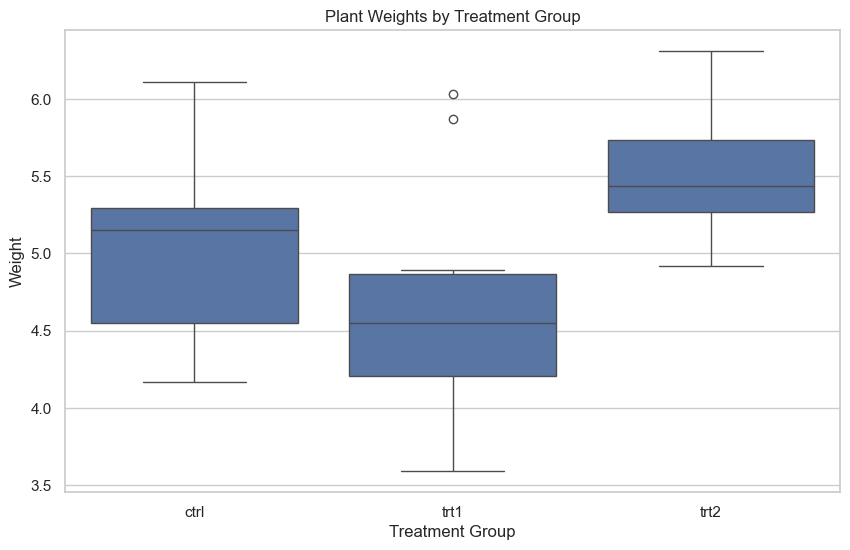

In [ ]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='weight', data=df)
plt.title('Plant Weights by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.show()



### Swarm Plot
https://seaborn.pydata.org/generated/seaborn.swarmplot.html

A swarm plot shows individual data points along with their distribution. This helps visualize the spread of data and identify any patterns or outliers.

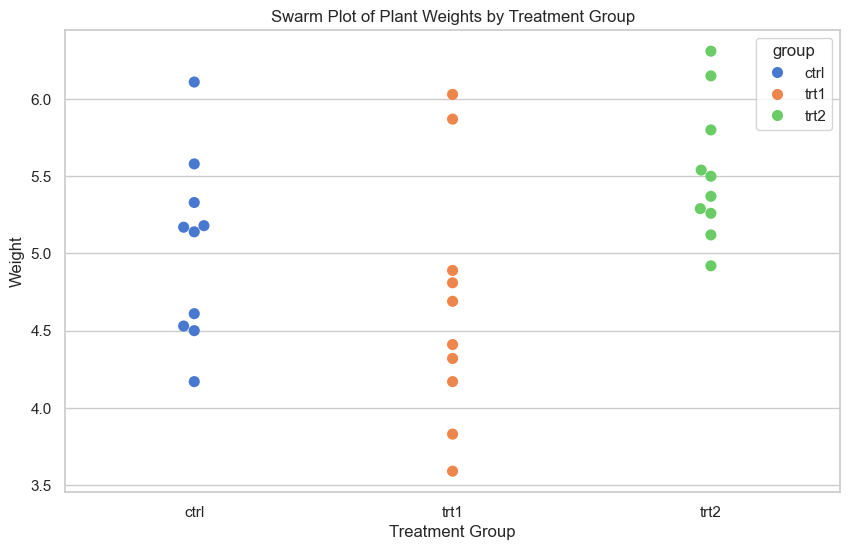

In [17]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='group', y='weight', data=df, hue='group', palette="muted", size=8, legend=True)
plt.title('Swarm Plot of Plant Weights by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.show()


### Violin Plot
https://seaborn.pydata.org/generated/seaborn.violinplot.html

A violin plot combines aspects of a box plot and a density plot, showing the distribution of the data across different treatment groups, and indicating where data points are concentrated.

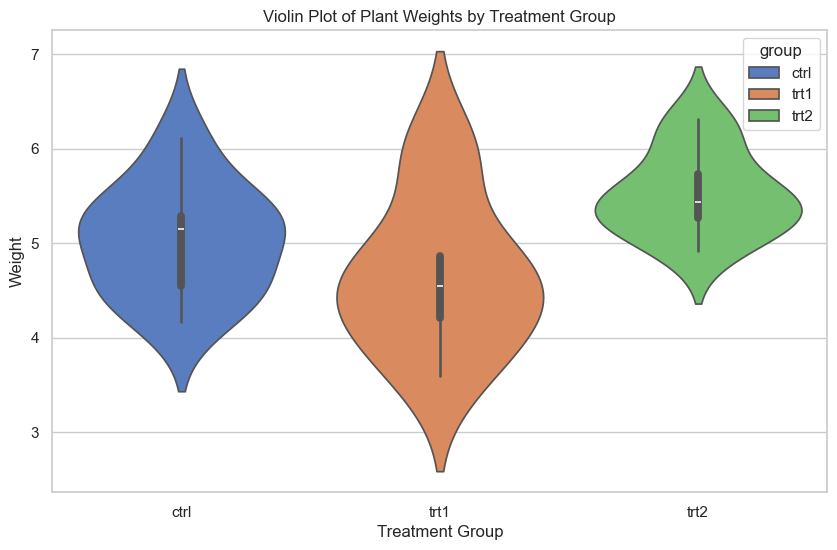

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='group', y='weight', data=df, hue='group', palette="muted", legend=True)
plt.title('Violin Plot of Plant Weights by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.show()